# Overfitting

**Interpréter les courbes d'apprentissage**

Vous pourriez penser que les informations contenues dans les données d'apprentissage sont de deux types : le signal et le bruit. Le signal est la partie qui généralise, la partie qui peut aider notre modèle à faire des prédictions à partir de nouvelles données. Le bruit est la partie qui n'est vraie que pour les données d'entraînement ; le bruit est l'ensemble des fluctuations aléatoires qui proviennent des données du monde réel ou de tous les modèles accidentels et non informatifs qui ne peuvent pas réellement aider le modèle à faire des prédictions. Le bruit est la partie peut sembler utile mais ne l'est vraiment pas.

Nous formons un modèle en choisissant des poids ou des paramètres qui minimisent la perte sur un ensemble de l'entrainement. Vous savez peut-être cependant que pour évaluer avec précision les performances d'un modèle, nous devons l'évaluer sur un nouvel ensemble de données, les données de validation. Si nous voyons que la perte sur les données de validation est beaucoup plus élevée que la perte sur les données d'entraînement, cela signifie que le modèle n'a pas généralisé à de nouvelles données, mais qu'il a plutôt appris le bruit des données d'entraînement. Si cela se produit, nous disons que le modèle est surajusté.

<!-- résistance contre les virus -->

<!-- 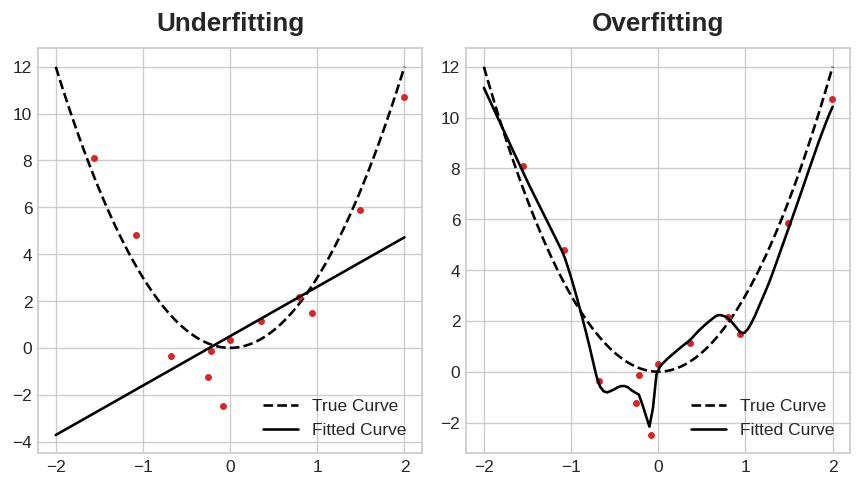 -->
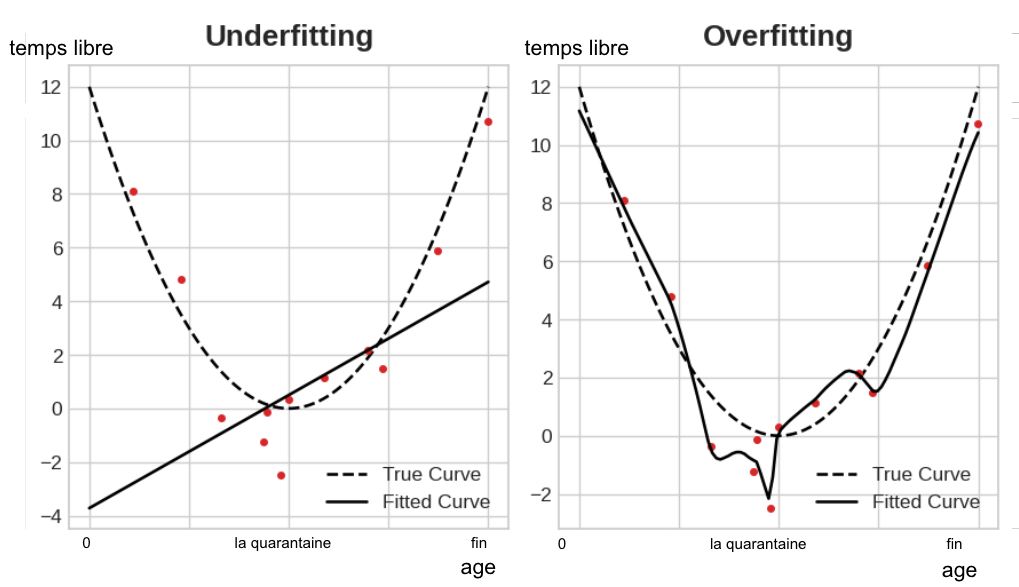

### Example avec l'arbre de décision

- Pour améliorer la précision de la prédiction d'un modèle, il est possible d'expérimenter avec différents modèles.
- Les modèles de type arbre de décision offrent de nombreuses options, dont la plus importante est la profondeur de l'arbre, c'est-à-dire le nombre de séparations qu'il effectue avant de parvenir à une prédiction.
- Plus un arbre est profond, plus le jeu de données est découpé en feuilles avec moins de maisons par feuille. Cela peut amener à un phénomène appelé surapprentissage (ou "overfitting") où le modèle correspond presque parfaitement aux données d'entraînement, mais performe mal avec de nouvelles données.
- Si un arbre est très peu profond, il ne divise pas les maisons en groupes très distincts. Cela peut entraîner un sous-apprentissage (ou "underfitting"), où le modèle ne capture pas les distinctions et les motifs importants dans les données, et donc performe mal même sur les données d'entraînement.
- L'objectif est de trouver le juste milieu entre le surapprentissage et le sous-apprentissage pour optimiser la précision sur de nouvelles données, estimée à partir de nos données de validation. Visuellement, on cherche le point le plus bas de la courbe de validation.

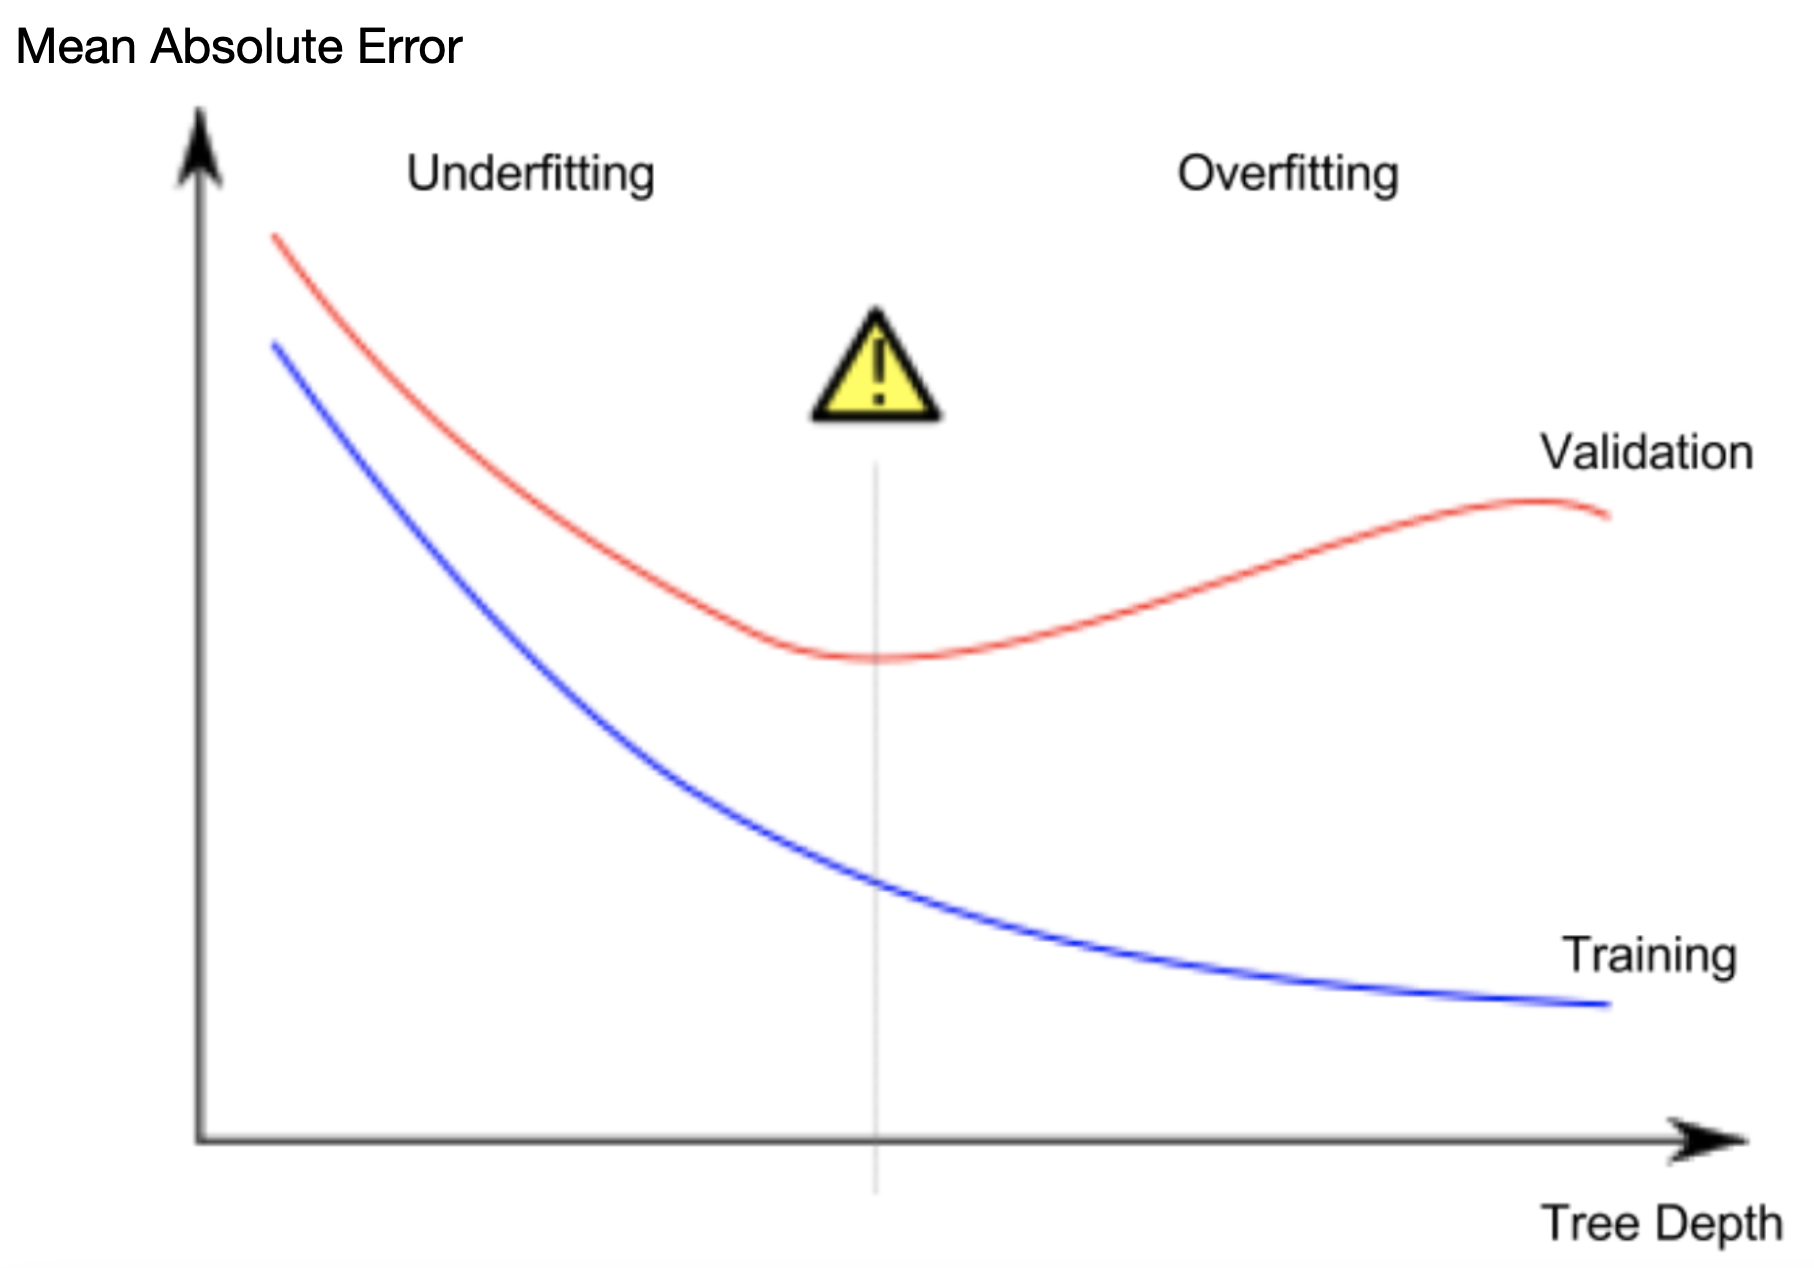


In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from helpers import tp2

# Compléter la fonction pour entrainer le modèle et evaluer la performance
def score_dataset(X_train, X_valid, y_train, y_valid):
    model = DecisionTreeRegressor(random_state=0)
    model.fit(X_train,y_train)
    predictions = model.predict(X_valid)
    return mean_absolute_error(y_valid,predictions)

# Compléter la fonction pour calculer l'erreur de prediction sur les données de validation et d'entrainement
def eval_DT(X_train, y_train, X_valid, y_valid, max_leaf_nodes):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model = model.fit(X_train, y_train)
    train_error = mean_absolute_error(y_train, model.predict(X_train))
    valid_error = mean_absolute_error(y_valid, model.predict(X_valid))
    return train_error, valid_error

# tp2.step1.hint()
# tp2.step1.solution()


In [29]:
# Charger des données
iowa_file_path = 'data/iowa_data.csv'
home_data = pd.read_csv(iowa_file_path)
home_data.dropna(axis=0, subset=['SalePrice'], inplace=True)

# Selectionner la cible
y = home_data.SalePrice  

# Pour simplifier, nous allons supprimer les colonnes avec des valeurs manquantes
cols_with_missing = [col for col in home_data.columns if home_data[col].isnull().any()]
X = home_data.drop(cols_with_missing, axis=1) 
X.drop(['SalePrice'], axis=1, inplace=True)

# Pour simplifier, nous allons supprimer les colonnes catégorielles
X = X.select_dtypes(exclude=['object'])

# Diviser les données en sous-ensembles d'entrainement et de validation
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                      random_state=0)

score = score_dataset(X_train, X_valid, y_train, y_valid)
print ("score = {}".format(score))


tp2.step2.check(score)
# tp2.step2.hint()
# tp2.step2.solution()


score = 26055.69178082192


  1 The score is correct. Good job!                                                                                

Nous pouvons utiliser une boucle for pour comparer la précision des modèles construits avec différentes valeurs pour max_leaf_nodes.

22612.1710363745
25927.343935477118


  1 The errors are correct. Good job!                                                                              

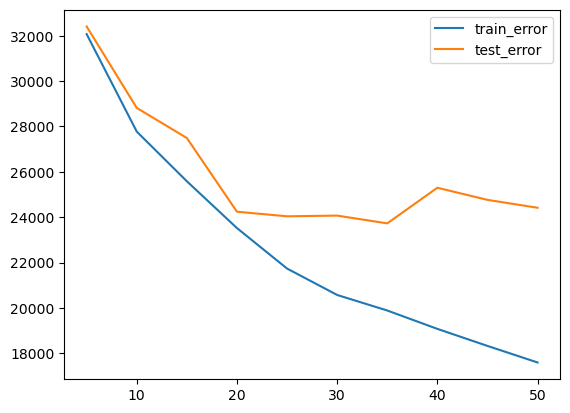

In [30]:
import numpy as np

train_errors = []
val_errors = []
max_leaf_nodes = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
for i in max_leaf_nodes:
    res = eval_DT(X_train, y_train, X_valid, y_valid, max_leaf_nodes=i)                                        
    train_errors.append(res[0])                                                                                
    val_errors.append(res[1])

print (np.mean(train_errors))
print (np.mean(val_errors))

tp2.step3.check(train_errors, val_errors)
# tp2.step3.hint()
# tp2.step3.solution()

import matplotlib.pyplot as plt
plt.plot(max_leaf_nodes,train_errors,label="train_error")
plt.plot(max_leaf_nodes,val_errors,label="test_error")
#plt.plot(range(1,50),res[:,2],label="Nb. leaves in DT")
plt.legend()
plt.show()


Trouver la valeur qui donne les scores MAE les plus bas :

In [31]:
best_leafs = np.argmin(val_errors)
print("Best leafs number: ", max_leaf_nodes[best_leafs])
print("Best MAE: ", val_errors[best_leafs])

Best leafs number:  35
Best MAE:  23726.134967507056


Notre modele avec max_leaf_nodes = 35 est le meilleur.

In [ ]:
best_model = DecisionTreeRegressor(max_leaf_nodes=best_leafs, random_state=0)
best_model = best_model.fit(X_train, y_train)

### Conclusion

Voici ce qu'il faut retenir : les modèles peuvent souffrir de :

- Sur-ajustement (overfitting) : le modèle correspond presque parfaitement aux données d'entraînement, mais performe mal avec de nouvelles données, ou
- Sous-ajustement (Underfitting) : le modèle ne capture pas les distinctions et les motifs importants dans les données, et donc performe mal même sur les données d'entraînement.

Nous utilisons des données de validation, qui ne sont pas utilisées dans la formation de modèles, pour mesurer la précision d'un modèle candidat. Cela nous permet d'essayer de nombreux modèles candidats et de garder le meilleur.